In [1]:
import os
import glob
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
def retrieve(start, end, data):
    
    """
    This is a function used to retrieve timeseries data within specific time duration.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset/file (needs to be either a dataframe or filename string)
        
    Return:
        data_df: a dataframe that shows the within the defined time range
    """
    import os
    import datetime as dt
    from datetime import datetime
    import pandas as pd
    from zoneinfo import ZoneInfo
    
    if isinstance(data, str):
        path = 'clean_data'
        path = os.path.join(path, data)
        data = pd.read_csv(path)
    elif isinstance(data, pd.DataFrame):
        data = data
    else:
        raise TypeError("input must be a string or a dataframe")
    
    timezone = ZoneInfo('America/Los_Angeles')
    data['date'] = pd.to_datetime(data['date'], utc=True).dt.tz_convert('America/Los_Angeles')
    start = datetime.strptime(start, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone)
    end = datetime.strptime(end, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone)
    after_start_date = data["date"] >= start
    before_end_date = data["date"] <= end
    between_two_dates = after_start_date & before_end_date
    
    # Using pandas.DataFrame.loc to Filter Rows by Dates
    data_df = data.loc[between_two_dates]
    return data_df

In [3]:
data1 = retrieve('2020-12-01 00:00:00', '2020-12-31 00:00:00', 'zone_co2.csv')
data1.head(10)

,date,zone_022_co2,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
520817,2020-12-01 00:00:00-08:00,422.0,431.0,422.0,429.0,424.0,435.0,429.0,416.0,423.0,439.0,418.0
520818,2020-12-01 00:01:00-08:00,435.0,440.0,437.0,425.0,429.0,434.0,432.0,421.0,429.0,442.0,418.0
520819,2020-12-01 00:02:00-08:00,428.0,434.0,441.0,433.0,438.0,438.0,428.0,418.0,420.0,442.0,427.0
520820,2020-12-01 00:03:00-08:00,425.0,434.0,433.0,427.0,438.0,437.0,426.0,424.0,424.0,424.0,428.0
520821,2020-12-01 00:04:00-08:00,433.0,435.0,434.0,419.0,433.0,434.0,435.0,432.0,423.0,426.0,425.0
520822,2020-12-01 00:05:00-08:00,438.0,443.0,420.0,425.0,422.0,436.0,432.0,424.0,417.0,430.0,422.0
520823,2020-12-01 00:06:00-08:00,447.0,441.0,427.0,425.0,419.0,444.0,433.0,434.0,427.0,431.0,427.0
520824,2020-12-01 00:07:00-08:00,436.0,444.0,431.0,427.0,423.0,442.0,420.0,425.0,440.0,436.0,416.0
520825,2020-12-01 00:08:00-08:00,441.0,441.0,428.0,417.0,432.0,443.0,431.0,414.0,438.0,442.0,426.0
520826,2020-12-01 00:09:00-08:00,432.0,430.0,431.0,429.0,436.0,440.0,432.0,412.0,419.0,436.0,427.0


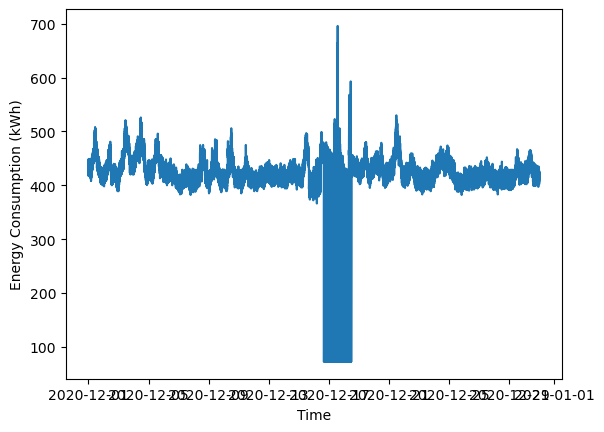

In [4]:
# Plot the co2 consumption over time
plt.plot(data1['date'], data1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

In [5]:
def hourly(start, end, data):
    
    """
    This is a function defined to derive hourly summary of the dataset.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset
        
    Return:
        data_df: a dataframe that shows the hourly summary of the input dataset

    """
    
    import datetime as dt
    from datetime import datetime
    import numpy as np
    from zoneinfo import ZoneInfo
    
    timezone = ZoneInfo('America/Los_Angeles')
    data['date'] = pd.to_datetime(data['date'])
    interval = dt.timedelta(hours=1)
    hourly_df = pd.DataFrame(columns=[data.columns])
    value_df = pd.DataFrame()
    time_df = pd.DataFrame()
    data_temp = pd.Series()
    while start < end:
        end_next = datetime.strptime(start, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone) + interval
        end_next = datetime.strftime(end_next, "%Y-%m-%d %H:%M:%S")
        value = retrieve(start, end_next, data).mean(numeric_only=True)
        date = pd.Series({'date': start}, dtype='datetime64[ns]')
        value_df = pd.concat([value_df, pd.DataFrame(value).transpose()], axis = 0)
        time_df = pd.concat([time_df, pd.DataFrame(date).transpose()], axis = 0)
        start = end_next

    hourly_df = pd.concat([time_df, value_df], axis = 1).reset_index(drop=True)
    
    return hourly_df

/tmp/ipykernel_203/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


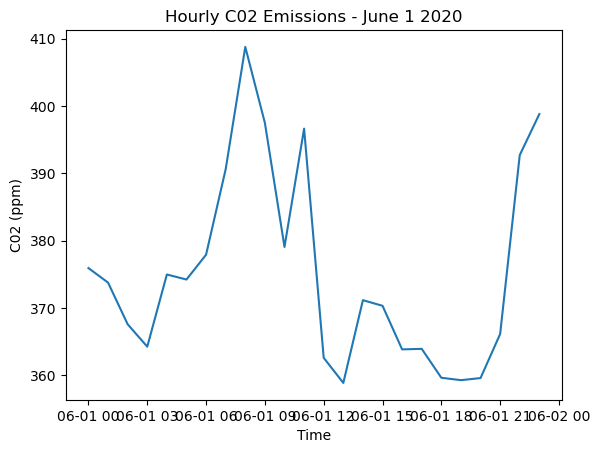

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot the co2 rate hourly on June 1
data1 = retrieve('2020-06-01 00:00:00', '2020-06-02 00:00:00', 'zone_co2.csv')
hourly1 = hourly('2020-06-01 00:00:00', '2020-06-02 00:00:00', data1)

plt.plot(hourly1['date'], hourly1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - June 1 2020")

plt.show()
plt.savefig('hourlyC02_june1.png')


/tmp/ipykernel_203/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


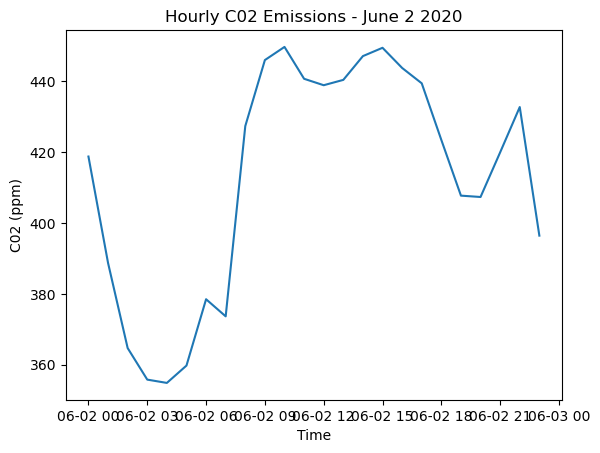

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the co2 rate hourly on June 2
data2 = retrieve('2020-06-02 00:00:00', '2020-06-03 00:00:00', 'zone_co2.csv')
hourly2 = hourly('2020-06-02 00:00:00', '2020-06-03 00:00:00', data2)

plt.plot(hourly2['date'], hourly2['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - June 2 2020")

plt.show()
plt.savefig('hourlyC02_june2.png')


/tmp/ipykernel_203/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


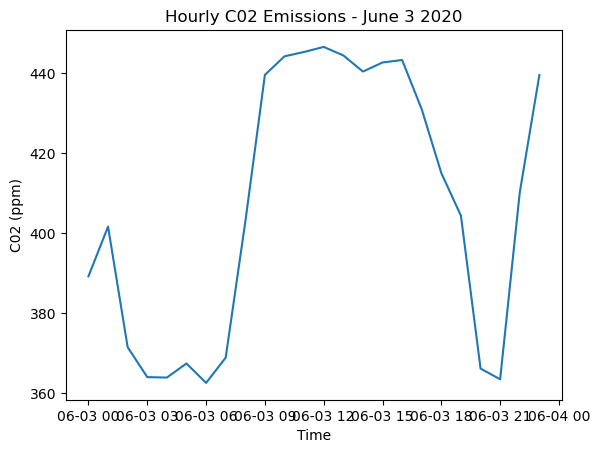

<Figure size 640x480 with 0 Axes>

In [26]:
# Plot the co2 rate hourly on June 3
data3 = retrieve('2020-06-03 00:00:00', '2020-06-04 00:00:00', 'zone_co2.csv')
hourly3 = hourly('2020-06-03 00:00:00', '2020-06-04 00:00:00', data3)

plt.plot(hourly3['date'], hourly3['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - June 3 2020")


plt.show()
plt.savefig('hourlyC02_june3.png')

/tmp/ipykernel_203/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


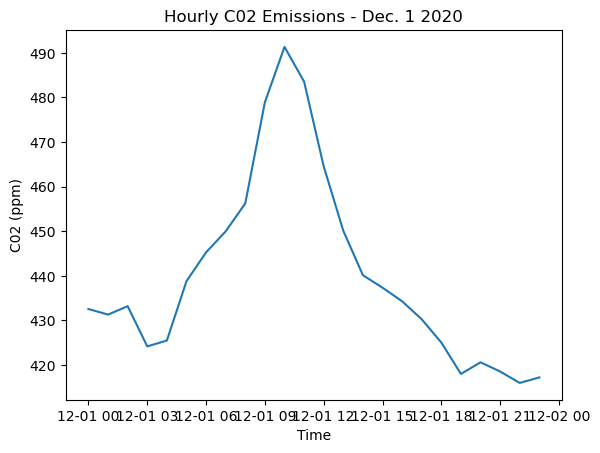

<Figure size 640x480 with 0 Axes>

In [27]:
# Plot the co2 rate hourly on December 1

data_dec = retrieve('2020-12-01 00:00:00', '2020-12-05 00:00:00', 'zone_co2.csv')
hourly_dec1 = hourly('2020-12-01 00:00:00', '2020-12-02 00:00:00', data_dec)

plt.plot(hourly_dec1['date'], hourly_dec1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - Dec. 1 2020")


plt.show()
plt.savefig('hourlyC02_dec1.png')

/tmp/ipykernel_203/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


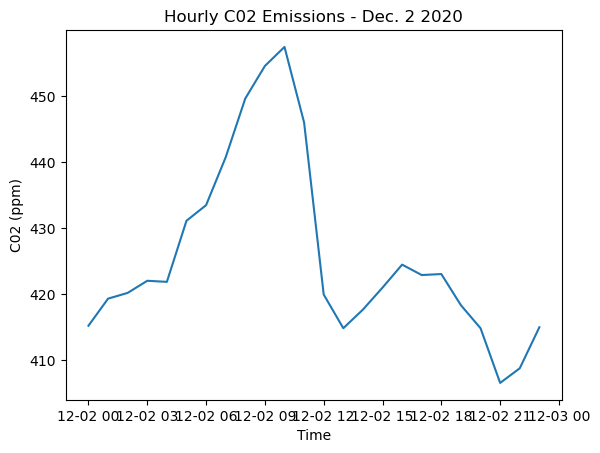

<Figure size 640x480 with 0 Axes>

In [28]:
# Plot the co2 rate hourly on December 2

hourly_dec1 = hourly('2020-12-02 00:00:00', '2020-12-03 00:00:00', data_dec)

plt.plot(hourly_dec1['date'], hourly_dec1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - Dec. 2 2020")

plt.show()
plt.savefig('hourlyC02_dec2.png')

/tmp/ipykernel_203/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


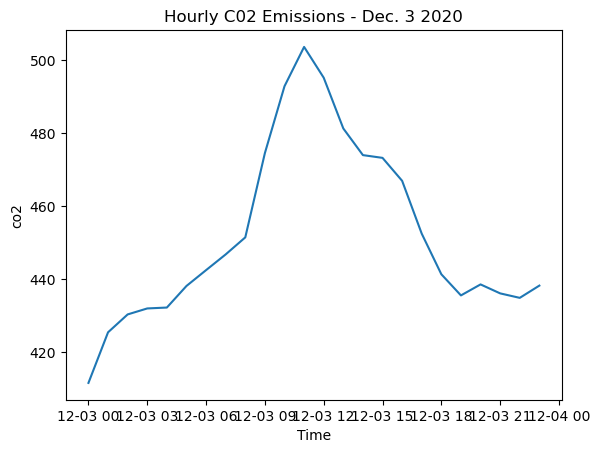

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot the co2 rate hourly on December 3

hourly_dec1 = hourly('2020-12-03 00:00:00', '2020-12-04 00:00:00', data_dec)

plt.plot(hourly_dec1['date'], hourly_dec1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('co2')
plt.title("Hourly C02 Emissions - Dec. 3 2020")


plt.show()
plt.savefig('hourlyC02_dec3.png')

In these figures we can observe that in the summertime, as seen in the visualization of the co2 levels throughout the days of June 1, 2, and 3 there is a spike in the c02 levels around mid-day to afternoon. This may be due to the relationship between temperature and c02 levels, where higher temperatures are related to higher co2 levels. It can also be the case that because of more extreme temperatures in the middle of the day to afternoon, more energy is used to cool the building, leading to higher c02 emissions. On the contrary, we can observe that during the winter in December 1, 2, and 3, there is a singular peak of co2 levels that occurs around mid-day. This might be the case that during the day, the most energy is used in the building, but only for a shorter period of time compared to the summer. This is a reasonable explanation taking into account the climate of Berkeley, where summers can get very hot and require the use of air-conditioning, while in the winter temperatures are generally cooler and don't need air-conditioning indoors. To conduct this analysis, we first imported the dataset, made the date variable hourly, and extracted the c02 levels of each hour of the day to create the visualizations using matplotlib. To conduct a more comprehensive analysis of the c02 levels throughout the day, it would be best to compare the trend for all days of the year, even across multiple years. This would help find out if there are any anomalies or outliers that should be considered when looking at patterns. It is also not clear just from this analysis what exactly causes the differing c02 emission levels throughout the day and may be due to several different factors. 

README: This project is an analysis on the dataset, which was curated from an office building constructed in 2015 in Berkeley, California, which includes whole-building and end-use energy consumption, HVAC system operating conditions, indoor and outdoor environmental parameters, and occupant counts. This dataset was used for various types of applications, including building energy benchmarking, load shape analysis, energy prediction, occupancy prediction and analytics, and HVAC controls to improve understanding and efficiency of building operations for reducing energy use, energy costs, and carbon emissions.